In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install boto3


   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   ----------- ---------------------------- 3.9/13.9 MB 18.1 MB/s eta 0:00:01
   --------------------------- ------------ 9.7/13.9 MB 23.2 MB/s eta 0:00:01
   ---------------------------------------- 13.9/13.9 MB 24.2 MB/s eta 0:00:00
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.69
    Uninstalling botocore-1.34.69:
      Successfully uninstalled botocore-1.34.69
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.39.12 which is incompatible.


In [ ]:
import boto3

In [11]:
s3_files = {
    'raw/olist_customers_dataset.csv': r'C:\Users\02adv\Desktop\cloud\Data\olist_customers_dataset.csv',
    'raw/olist_geolocation_dataset.csv': r'C:\Users\02adv\Desktop\cloud\Data\olist_geolocation_dataset.csv',
    'raw/olist_order_items_dataset.csv': r'C:\Users\02adv\Desktop\cloud\Data\olist_order_items_dataset.csv',
    'raw/olist_order_payments_dataset.csv': r'C:\Users\02adv\Desktop\cloud\Data\olist_order_payments_dataset.csv',
    'raw/olist_order_reviews_dataset.csv': r'C:\Users\02adv\Desktop\cloud\Data\olist_order_reviews_dataset.csv',
    'raw/olist_orders_dataset.csv': r'C:\Users\02adv\Desktop\cloud\Data\olist_orders_dataset.csv',
    'raw/olist_products_dataset.csv': r'C:\Users\02adv\Desktop\cloud\Data\olist_products_dataset.csv',
    'raw/olist_sellers_dataset.csv': r'C:\Users\02adv\Desktop\cloud\Data\olist_sellers_dataset.csv',
    'raw/product_category_name_translation.csv': r'C:\Users\02adv\Desktop\cloud\Data\product_category_name_translation.csv'
}


In [ ]:
import boto3

# Create session
session = boto3.Session(
    aws_access_key_id='put your aws access key',
    aws_secret_access_key='put your aws access key',
    region_name='ap-south-1'
)

s3 = session.client('s3')
bucket_name = 'e-commerce-analysis'

# File list from your verified S3 contents
s3_files = {
    'raw/olist_customers_dataset.csv': r'C:\Users\02adv\Desktop\cloud\Data\olist_customers_dataset.csv',
    'raw/olist_geolocation_dataset.csv': r'C:\Users\02adv\Desktop\cloud\Data\olist_geolocation_dataset.csv',
    'raw/olist_order_items_dataset.csv': r'C:\Users\02adv\Desktop\cloud\Data\olist_order_items_dataset.csv',
    'raw/olist_order_payments_dataset.csv': r'C:\Users\02adv\Desktop\cloud\Data\olist_order_payments_dataset.csv',
    'raw/olist_order_reviews_dataset.csv': r'C:\Users\02adv\Desktop\cloud\Data\olist_order_reviews_dataset.csv',
    'raw/olist_orders_dataset.csv': r'C:\Users\02adv\Desktop\cloud\Data\olist_orders_dataset.csv',
    'raw/olist_products_dataset.csv': r'C:\Users\02adv\Desktop\cloud\Data\olist_products_dataset.csv',
    'raw/olist_sellers_dataset.csv': r'C:\Users\02adv\Desktop\cloud\Data\olist_sellers_dataset.csv',
    'raw/product_category_name_translation.csv': r'C:\Users\02adv\Desktop\cloud\Data\product_category_name_translation.csv'
}

# Loop with error handling
for s3_key, local_path in s3_files.items():
    try:
        s3.download_file(bucket_name, s3_key, local_path)
        print(f"✅ Downloaded: {s3_key}")
    except Exception as e:
        print(f"❌ Failed to download {s3_key}: {e}")

print("🎉 All available files downloaded successfully!")


✅ Downloaded: raw/olist_customers_dataset.csv
✅ Downloaded: raw/olist_geolocation_dataset.csv
✅ Downloaded: raw/olist_order_items_dataset.csv
✅ Downloaded: raw/olist_order_payments_dataset.csv
✅ Downloaded: raw/olist_order_reviews_dataset.csv
✅ Downloaded: raw/olist_orders_dataset.csv
✅ Downloaded: raw/olist_products_dataset.csv
✅ Downloaded: raw/olist_sellers_dataset.csv
✅ Downloaded: raw/product_category_name_translation.csv
🎉 All available files downloaded successfully!


In [ ]:
df = pd.read_csv(r'C:\Users\02adv\Desktop\cloud\Data\olist_customers_dataset.csv')
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
df1 = pd.read_csv('olist_orders_dataset.csv')     # orders
df1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
df1.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
df1.dropna(inplace=True)

In [17]:
df1.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [19]:
df2 = pd.read_csv('olist_order_items_dataset.csv')
df2.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [21]:
df2.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [24]:
df3 = pd.read_csv('olist_order_payments_dataset.csv')
df3.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [26]:
df3.isnull

<bound method DataFrame.isnull of                                 order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_val

In [28]:
df4 = pd.read_csv('olist_order_reviews_dataset.csv', encoding='latin1')
df4.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,43118.0,43118.90763,I had an order that was lost in transit. When ...
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,43169.0,43170.12862,I ordered the wrong size tee and had difficult...
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,43148.0,43149.60861,These guys offer the best customer service in ...
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,42846.0,42846.91813,Looked for an obscure phrase on a shirt. Teepu...
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,43160.0,43161.43534,My order arrived in a good timely fashion & th...


In [30]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   review_id                99224 non-null  object 
 1   order_id                 99224 non-null  object 
 2   review_score             99224 non-null  int64  
 3   review_creation_date     99224 non-null  float64
 4   review_answer_timestamp  99224 non-null  float64
 5   review                   99224 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.5+ MB


In [32]:
df4.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
review                     0
dtype: int64

In [34]:
df4.duplicated().sum()

0

In [36]:
df5 = pd.read_csv('olist_products_dataset.csv')
df5.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [38]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
df5.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [42]:
df5.dropna(inplace=True)

In [44]:
df5.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [47]:
df7 = pd.read_csv('olist_sellers_dataset.csv')
df7.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [49]:
df7.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [51]:
df7.duplicated().sum()

0

In [53]:
df6 = pd.read_csv('olist_geolocation_dataset.csv')
df6.tail(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS


In [55]:
df6.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [57]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [59]:
df6.shape

(1000163, 5)

In [61]:
df8 = pd.read_csv('product_category_name_translation.csv')
df8.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [63]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [68]:
df9 = pd.merge(df5, df8, on='product_category_name', how='left')
df9.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [70]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32340 entries, 0 to 32339
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32340 non-null  object 
 1   product_category_name          32340 non-null  object 
 2   product_name_lenght            32340 non-null  float64
 3   product_description_lenght     32340 non-null  float64
 4   product_photos_qty             32340 non-null  float64
 5   product_weight_g               32340 non-null  float64
 6   product_length_cm              32340 non-null  float64
 7   product_height_cm              32340 non-null  float64
 8   product_width_cm               32340 non-null  float64
 9   product_category_name_english  32327 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [72]:
df9.drop('product_category_name',axis=1,inplace=True)

In [74]:
df9.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


# MERGING THE DATASETS

In [76]:
df_train = df1.merge(df2, on = 'order_id',how='left')
df_train = df_train.merge(df3, on='order_id',how='outer',validate='m:m')
df_train = df_train.merge(df4, on='order_id',how='outer')
df_train = df_train.merge(df5, on = 'product_id', how='outer')
df_train = df_train.merge(df, on = 'customer_id',how='outer')
df_train = df_train.merge(df7, on = 'seller_id', how='outer')

print(df_train.shape)

(122695, 38)


In [78]:
df_train.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366.0,sao paulo,SP,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290.0,sao paulo,SP,9350.0,maua,SP


In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122695 entries, 0 to 122694
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118875 non-null  object 
 1   customer_id                    118686 non-null  object 
 2   order_status                   115706 non-null  object 
 3   order_purchase_timestamp       115706 non-null  object 
 4   order_approved_at              115706 non-null  object 
 5   order_delivered_carrier_date   115706 non-null  object 
 6   order_delivered_customer_date  115706 non-null  object 
 7   order_estimated_delivery_date  115706 non-null  object 
 8   order_item_id                  115706 non-null  float64
 9   product_id                     116421 non-null  object 
 10  seller_id                      115831 non-null  object 
 11  shipping_limit_date            115706 non-null  object 
 12  price                         

In [86]:
# df_train['price_log'] = np.log(df_train['price']+1.5)

In [82]:
df_train.isnull().sum()

order_id                         3820
customer_id                      4009
order_status                     6989
order_purchase_timestamp         6989
order_approved_at                6989
order_delivered_carrier_date     6989
order_delivered_customer_date    6989
order_estimated_delivery_date    6989
order_item_id                    6989
product_id                       6274
seller_id                        6864
shipping_limit_date              6989
price                            6989
freight_value                    6989
payment_sequential               3823
payment_type                     3823
payment_installments             3823
payment_value                    3823
review_id                        4805
review_score                     4805
review_creation_date             4805
review_answer_timestamp          4805
review                           4805
product_category_name            7912
product_name_lenght              7912
product_description_lenght       7912
product_phot

In [84]:
missing_info = df_train.isnull().sum().sort_values(ascending=False)
print(missing_info[missing_info>0])

product_name_lenght              7912
product_category_name            7912
product_description_lenght       7912
product_photos_qty               7912
product_weight_g                 7912
product_length_cm                7912
product_height_cm                7912
product_width_cm                 7912
freight_value                    6989
price                            6989
shipping_limit_date              6989
order_item_id                    6989
order_estimated_delivery_date    6989
order_delivered_customer_date    6989
order_delivered_carrier_date     6989
order_approved_at                6989
order_purchase_timestamp         6989
order_status                     6989
seller_id                        6864
seller_city                      6864
seller_zip_code_prefix           6864
seller_state                     6864
product_id                       6274
review_score                     4805
review                           4805
review_answer_timestamp          4805
review_creat

In [100]:
# classifying columns into different data types
# Numerical
num_cols = df_train.select_dtypes(include='number').columns
num_cols
# Categorical
# Date/time

Index(['order_item_id', 'price', 'freight_value', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_zip_code_prefix',
       'seller_zip_code_prefix'],
      dtype='object')

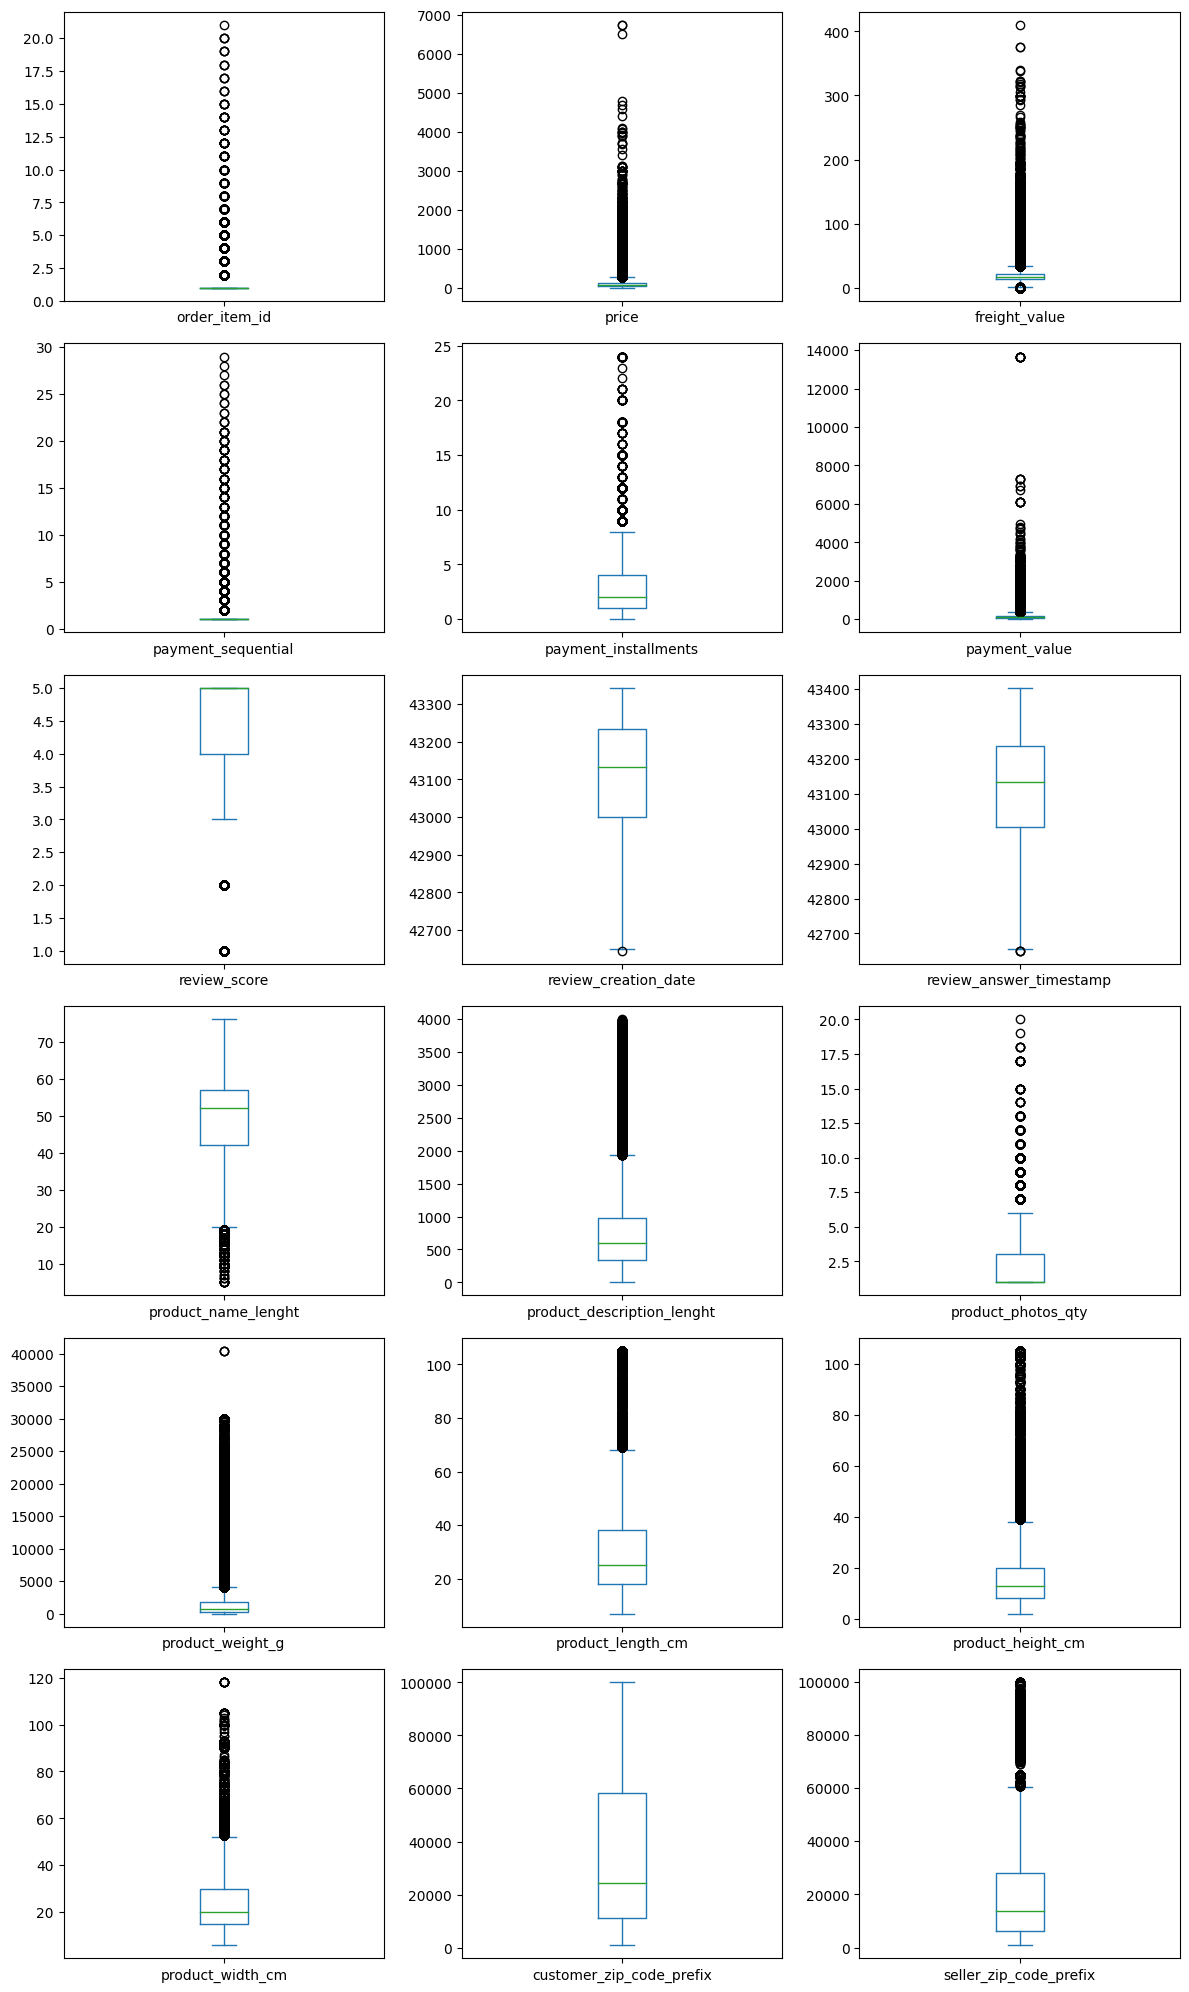

In [123]:
num_df = df_train.select_dtypes(include='number')
num_df.plot(kind='box', subplots=True, layout=(6,3), figsize=(12, 20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [125]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df_train[num_cols] = imputer.fit_transform(df_train[num_cols])

In [127]:
df_train.dropna(inplace=True)

In [129]:
df_train.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
review                           0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm   

# HANDLING OUTLIERS

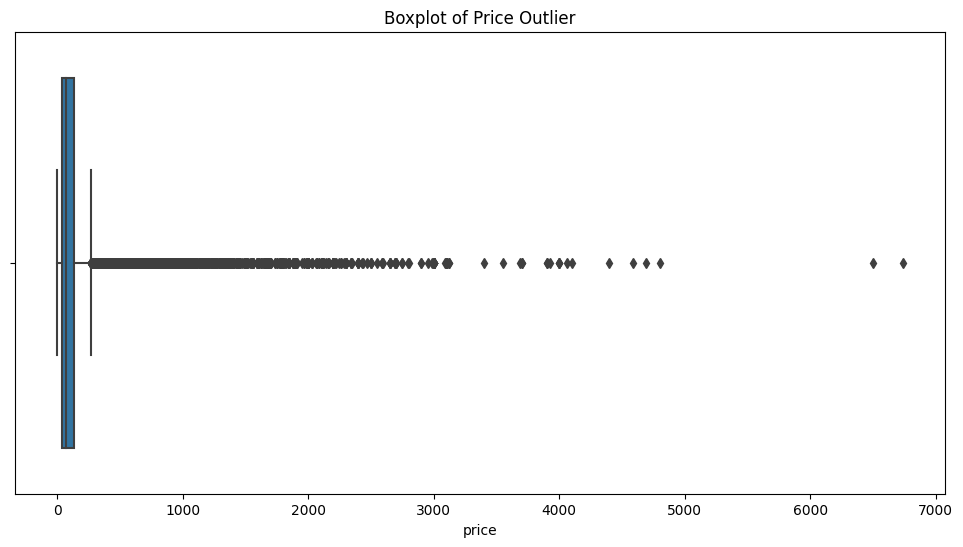

In [132]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_train["price"])
plt.title("Boxplot of Price Outlier")
plt.show()

In [134]:
# Handling outliers of the price attribute

# Calculate Q1, Q3 and IQR
Q1 = df_train["price"].quantile(0.25)
Q3 = df_train["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train['price_capped'] = df_train['price'].apply(
    lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
)

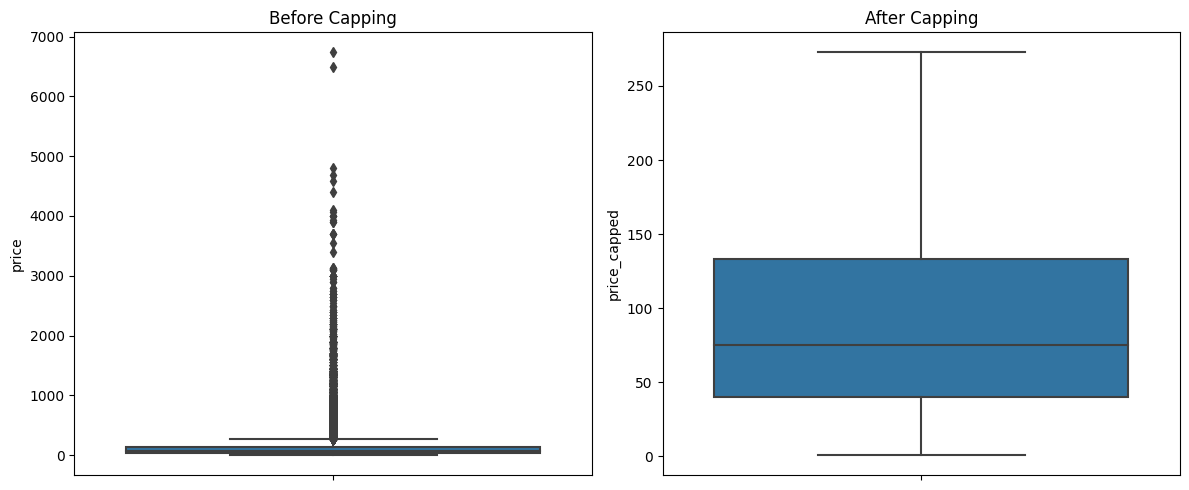

In [136]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df_train, y='price', ax=axs[0])
axs[0].set_title('Before Capping')

sns.boxplot(data=df_train, y='price_capped', ax=axs[1])
axs[1].set_title('After Capping')

plt.tight_layout()
plt.show()

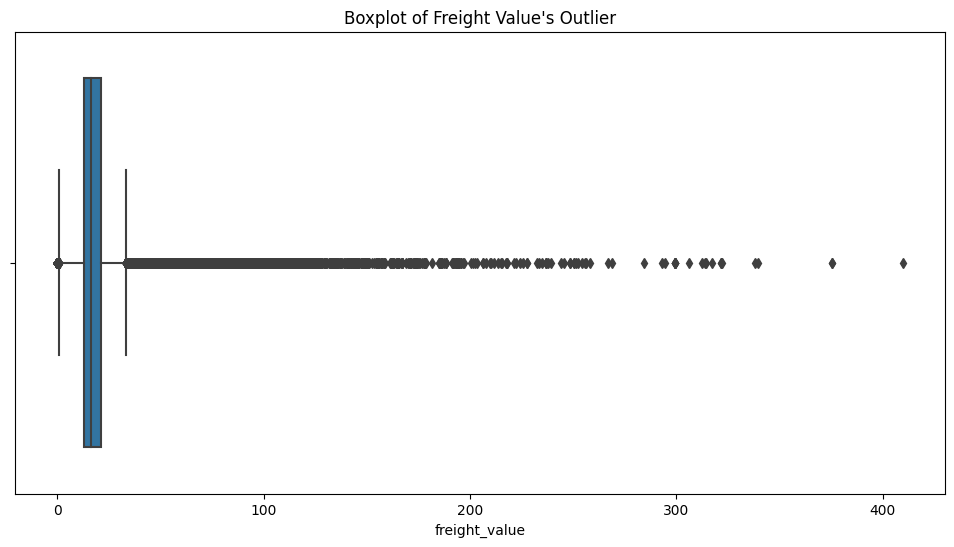

In [138]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_train["freight_value"])
plt.title("Boxplot of Freight Value's Outlier")
plt.show()

In [140]:
Q1 = df_train["freight_value"].quantile(0.25)
Q3 = df_train["freight_value"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train['freight_capped'] = df_train['freight_value'].apply(
    lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
)

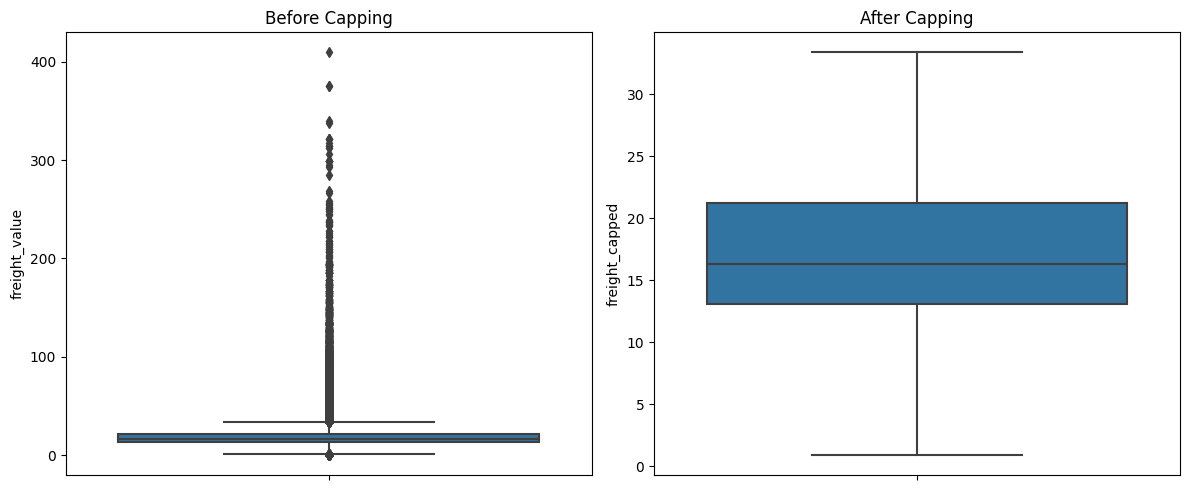

In [142]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df_train, y='freight_value', ax=axs[0])
axs[0].set_title('Before Capping')

sns.boxplot(data=df_train, y='freight_capped', ax=axs[1])
axs[1].set_title('After Capping')

plt.tight_layout()
plt.show()

In [146]:
def outlier_ratio(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).mean() * 100

for col in df_train.select_dtypes(include='number'):
    print(f"{col}: {outlier_ratio(df_train[col]):.2f}% outliers")

order_item_id: 12.39% outliers
price: 7.48% outliers
freight_value: 10.73% outliers
payment_sequential: 4.28% outliers
payment_installments: 6.84% outliers
payment_value: 8.03% outliers
review_score: 14.76% outliers
review_creation_date: 0.00% outliers
review_answer_timestamp: 0.00% outliers
product_name_lenght: 0.68% outliers
product_description_lenght: 6.29% outliers
product_photos_qty: 2.76% outliers
product_weight_g: 14.12% outliers
product_length_cm: 3.20% outliers
product_height_cm: 6.83% outliers
product_width_cm: 2.32% outliers
customer_zip_code_prefix: 0.00% outliers
seller_zip_code_prefix: 15.49% outliers
price_capped: 0.00% outliers
freight_capped: 0.00% outliers


In [148]:
cols = ['payment_value', 'payment_installments',
'product_weight_g', 'product_description_lenght',
'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_photos_qty']

In [150]:
def cap_outliers(df_train,cols):
    df_cap = df_train.copy()
    for col in cols:
        Q1 = df_cap[col].quantile(0.25)
        Q3 = df_cap[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_cap[col] = df_cap[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return df_cap

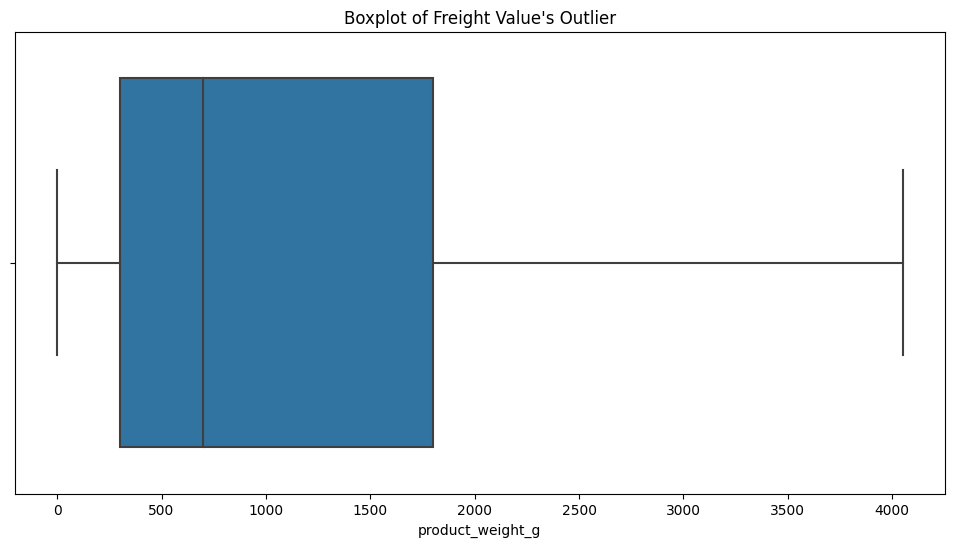

In [156]:
df_cap = cap_outliers(df_train,cols)

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cap["product_weight_g"])
plt.title("Boxplot of Freight Value's Outlier")
plt.show()

In [158]:
df_train = cap_outliers(df_train,cols)

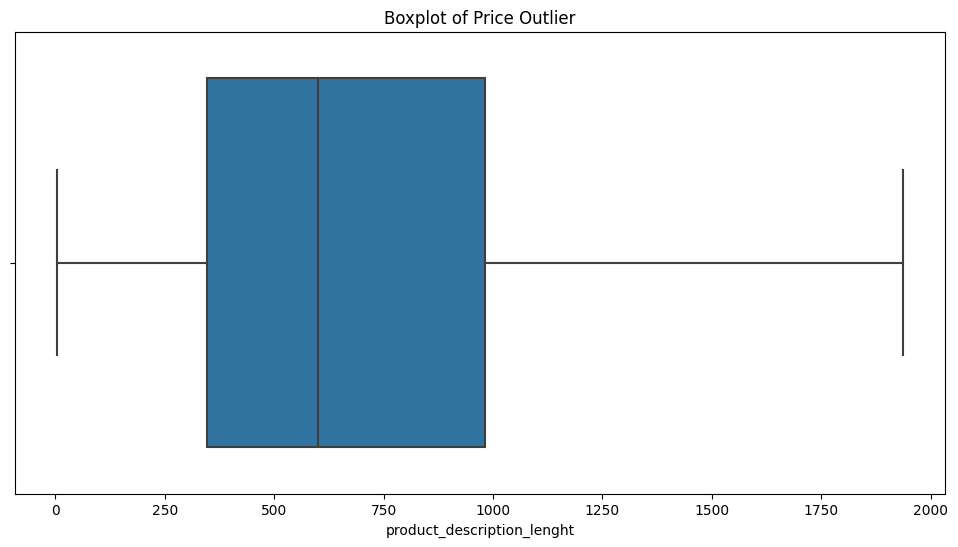

In [160]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_train["product_description_lenght"])
plt.title("Boxplot of Price Outlier")
plt.show()

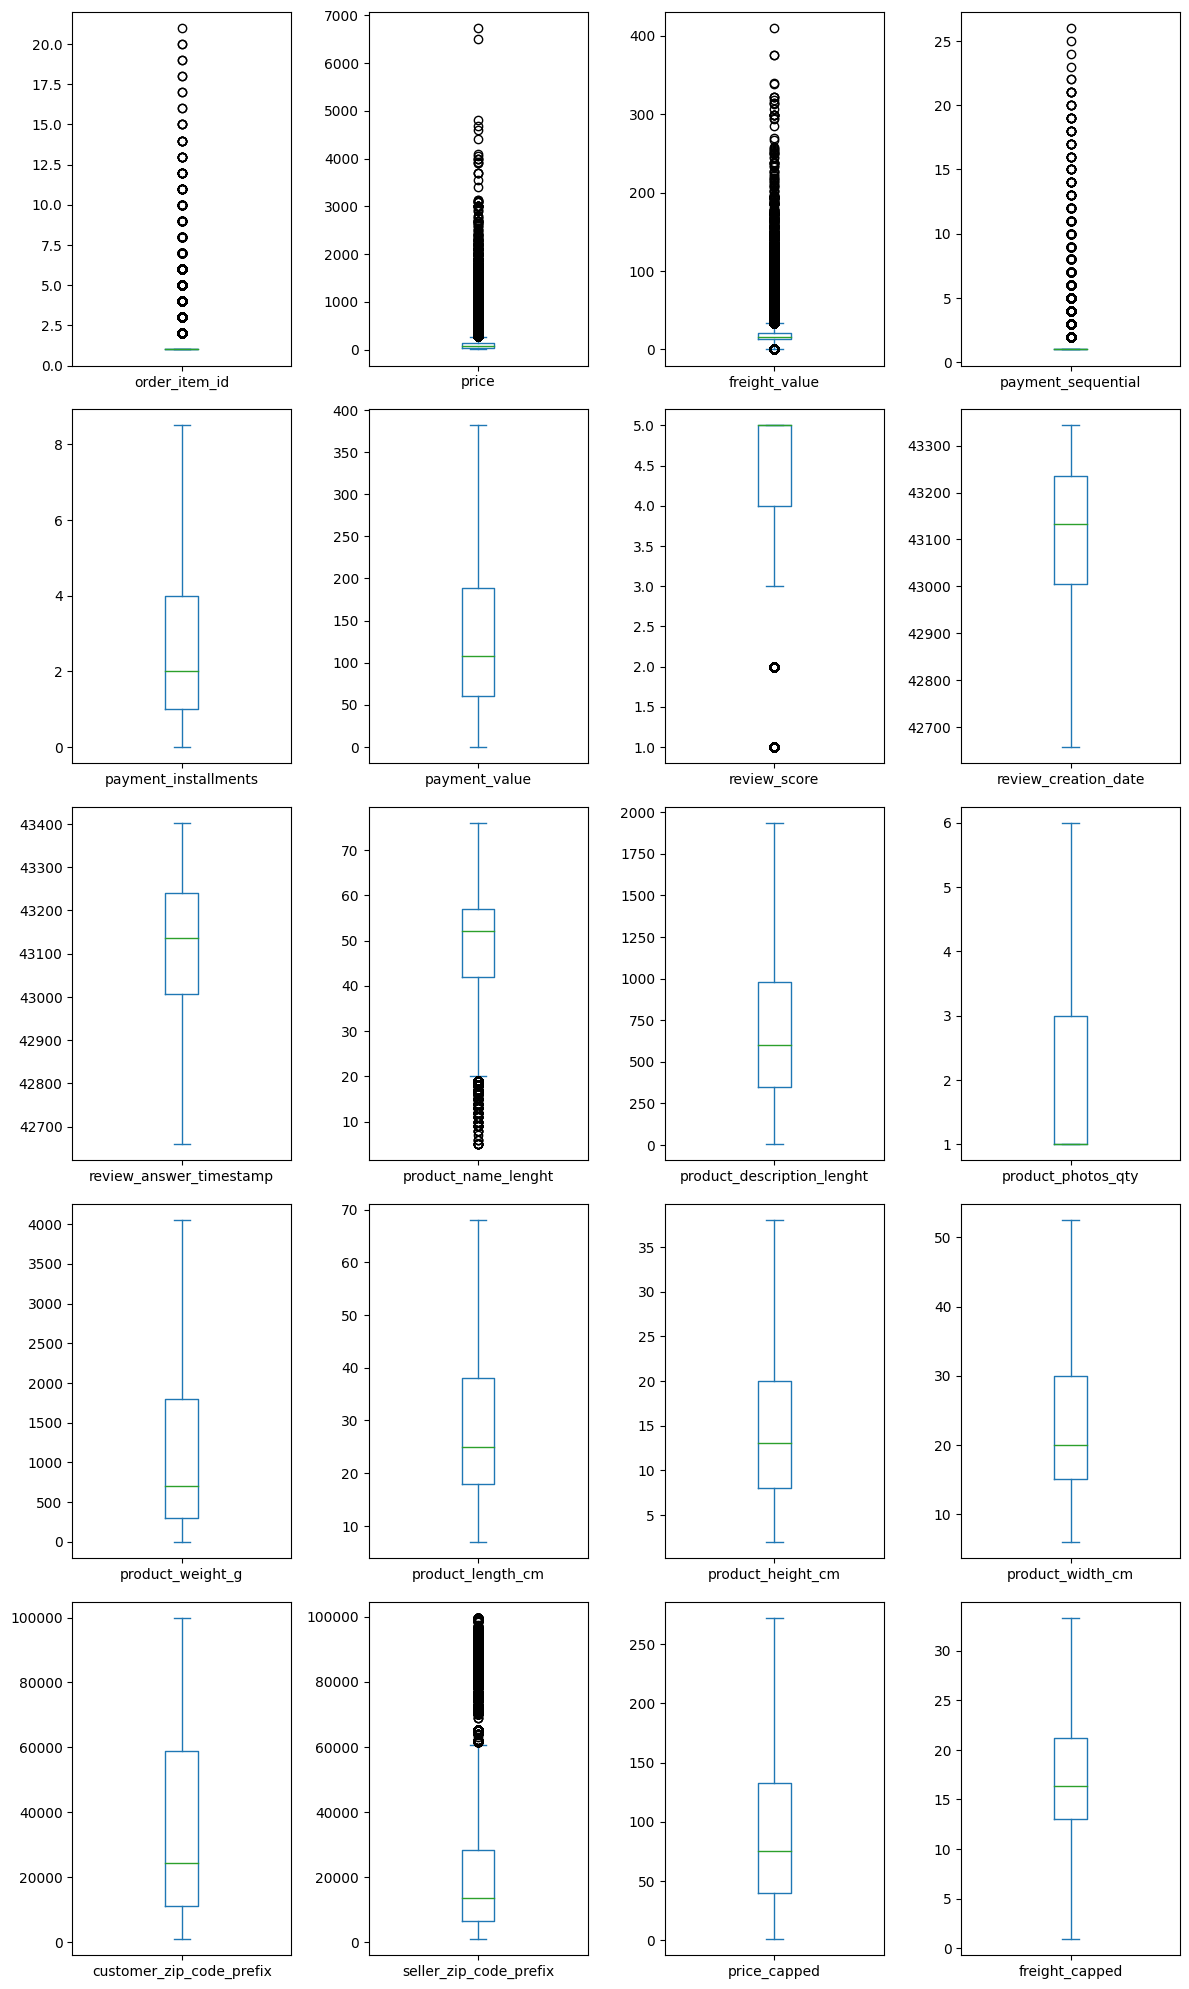

In [164]:
num_df = df_train.select_dtypes(include='number')
num_df.plot(kind='box', subplots=True, layout=(5,4), figsize=(12, 20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [166]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113216 entries, 0 to 115705
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113216 non-null  object 
 1   customer_id                    113216 non-null  object 
 2   order_status                   113216 non-null  object 
 3   order_purchase_timestamp       113216 non-null  object 
 4   order_approved_at              113216 non-null  object 
 5   order_delivered_carrier_date   113216 non-null  object 
 6   order_delivered_customer_date  113216 non-null  object 
 7   order_estimated_delivery_date  113216 non-null  object 
 8   order_item_id                  113216 non-null  float64
 9   product_id                     113216 non-null  object 
 10  seller_id                      113216 non-null  object 
 11  shipping_limit_date            113216 non-null  object 
 12  price                          1132

In [168]:
df_train.drop(columns=['price', 'freight_value'], inplace=True)

In [172]:
df_train.rename(columns={'price_capped':'price','freight_capped':'freight_value'},inplace=True)

In [174]:
df_train.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP,29.99,8.72
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366.0,sao paulo,SP,9350.0,maua,SP,29.99,7.78
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,13.0,ef0996a1a279c26e7ecbd737be23d235,2290.0,sao paulo,SP,9350.0,maua,SP,29.99,7.78


In [178]:
df_train.shape

(113216, 38)